## Spam Messege Classification 
### Identifying weather the text messege is SPAM or HAM

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t',names=["type","text"])
df.head(10)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
df.isna().sum()

type    0
text    0
dtype: int64

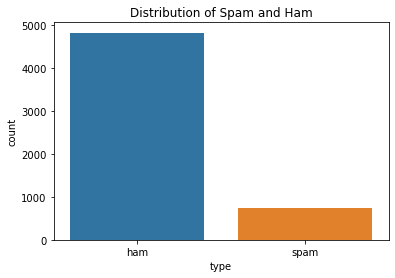

In [4]:
sns.countplot(x='type',data=df);
plt.title('Distribution of Spam and Ham');

## Data Preprocessing
### Removing [puncututations,numbers and Stopwords from our data]

In [5]:
def clean_text(text):
    new_text = re.sub('[^a-zA-Z]',' ',text)
    new_text = new_text.lower()
    new_text = new_text.split()
    new_text = [word for word in new_text if not word in set(stopwords.words('english'))]
    return(new_text)

In [6]:
df['text'] = df['text'].apply(clean_text)

In [7]:
df.head()

,type,text
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


### Applying stemming to text

In [8]:
from nltk.stem import PorterStemmer
stemm = PorterStemmer()

In [9]:
df['clean_text'] = df['text'].apply(lambda x: [stemm.stem(y) for y in x]) # Stem every word.
df.drop(columns=['text'],inplace=True)

In [10]:
df.head()

,type,clean_text
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"


In [11]:
df["clean_text"]= df["clean_text"].str.join(' ')

In [12]:
df.head()

,type,clean_text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


### Labeling {'ham':1, 'spam':0}

In [13]:
df['type'] = df['type'].replace({'ham':1, 'spam':0})

In [14]:
df.head()

,type,clean_text
0,1,go jurong point crazi avail bugi n great world...
1,1,ok lar joke wif u oni
2,0,free entri wkli comp win fa cup final tkt st m...
3,1,u dun say earli hor u c alreadi say
4,1,nah think goe usf live around though


In [29]:
df_x = df['clean_text']
df_y = df['type']

### Converting text to vectors using BagofWord

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 37)

In [31]:
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672


In [32]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [33]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 26338 stored elements in Compressed Sparse Row format>

In [34]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1672x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 11059 stored elements in Compressed Sparse Row format>

## Naive bayes classification

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
mnb = MultinomialNB(alpha = 0.5)

In [42]:
mnb.fit(X_train_cv,y_train)

MultinomialNB(alpha=0.5)

In [43]:
y_mnb = mnb.predict(X_test_cv)

In [44]:
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb, y_test))

Naive Bayes Accuracy:  0.9844497607655502


In [45]:
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes confusion_matrix:  [[ 230   16]
 [  10 1416]]


## Decision tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier(min_samples_split=7, random_state=252)

In [48]:
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier(min_samples_split=7, random_state=252)

In [50]:
y_dtc = dt.predict(X_test_cv)

In [51]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))

Decision Tree Accuracy:  0.9754784688995215
Decision Tree confusion_matrix:  [[ 216   17]
 [  24 1415]]
